In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


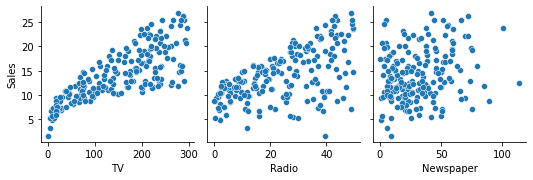

In [9]:
sns.pairplot(df, y_vars=['Sales'], x_vars=['TV', 'Radio','Newspaper'])

In [10]:
X = df[['TV', 'Radio', 'Newspaper']]

y = df['Sales']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [13]:
X_train.shape

(140, 3)

In [14]:
X_test.shape

(60, 3)

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
lm.intercept_

2.652789668879498

In [20]:
lm.coef_

array([0.0454256 , 0.18975773, 0.00460308])

In [23]:
coeff_df = pd.DataFrame(lm.coef_, X_test.columns, columns=['Coefficient'])

In [24]:
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [25]:
y_pred = lm.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_pred, y_test)

In [27]:
r_squared = r2_score(y_pred, y_test)

In [28]:
mse

1.8506819941636963

In [29]:
r_squared

0.9012173167575984